In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
np.arange(0,4,1)

array([0, 1, 2, 3])

In [19]:
group_intervals = np.arange(0, 248000, 1000)

In [20]:
sr = 25
times = np.arange(0,32,1, dtype=float)*sr

In [21]:
READ_PATH = '/Users/lukepolson/Documents/test_data/pulse_347848/'

In [22]:
COLUMNS = ['RunNumber','LBNumber',  'EventNumber','BCID','LArError','ncells', 'ECell',
            'TCell', 'EtaCell', 'PhiCell', 'LayerCell','ProvCell', 'QuaCell','GainCell',
            'HwidCell','ADC',]

7791 and 26323 are identification numbers of the cells.

In [23]:
HW_IDs = list(np.arange(500,600,1))
DFS = [pd.DataFrame(columns=COLUMNS)]*len(HW_IDs)
DFS_DICT = dict(zip(HW_IDs, DFS))

# This is the Code that Works

In [17]:
for (i,filename) in enumerate(os.listdir(READ_PATH)):
    print(i) 
    if filename.endswith(".pkl"):
        opened_df = pd.read_pickle(READ_PATH+filename)
    opened_df['groups']=pd.cut(opened_df['HwidCell'],group_intervals)
    grouped = opened_df.groupby('groups')
    for name, group in grouped:
        file_loc = READ_PATH+'csvs/cell_'+str(name)+'.csv'
        with open(file_loc, 'a') as f:
            group.to_csv(f, header=f.tell()==0)
    del(opened_df)

0


To request implementation, send an email to feature_requests@modin.org.
Exception in thread ray_print_logs:
Traceback (most recent call last):
  File "/Users/lukepolson/anaconda3/lib/python3.6/site-packages/redis/connection.py", line 185, in _read_from_socket
    raise socket.error(SERVER_CLOSED_CONNECTION_ERROR)
OSError: Connection closed by server.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/lukepolson/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/lukepolson/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/lukepolson/anaconda3/lib/python3.6/site-packages/ray/worker.py", line 1554, in print_logs
    msg = pubsub_client.get_message()
  File "/Users/lukepolson/anaconda3/lib/python3.6/site-packages/redis/client.py", line 3135, in get_message
    response = self.parse_response(block=False, timeo

KeyboardInterrupt: 

In [10]:
BIG_DF = pd.DataFrame(columns=COLUMNS)
for (i,filename) in enumerate(os.listdir(READ_PATH)):
    if i%20==0:
        print(i)
        BIG_DF['groups']=pd.cut(BIG_DF['HwidCell'],group_intervals)
        print(i)
        grouped = BIG_DF.groupby('groups')
        print(i)
        for name, group in grouped:
            file_loc = READ_PATH+'csvs/cell_'+str(name)+'.csv'
            with open(file_loc, 'a') as f:
                group.sort_values(by=['HwidCell']).to_csv(f, header=f.tell()==0)
        del(BIG_DF)
        BIG_DF = pd.DataFrame(columns=COLUMNS)
            
    if filename.endswith(".pkl"):
        opened_df = pd.read_pickle(READ_PATH+filename)
        BIG_DF = pd.concat([opened_df, BIG_DF])
        del(opened_df)
        

0
0
0
20
20
20


KeyboardInterrupt: 

In [15]:
def get_lag_time_col(row):
    if (row['LBNumber']>=157 and row['LBNumber']<=189):
        return 0
    elif (row['LBNumber']>=190 and row['LBNumber']<=252):
        return 12.5
    elif (row['LBNumber']>=253 and row['LBNumber']<=284):
        return 6.25
    elif (row['LBNumber']>=285 and row['LBNumber']<=313):
        return 18.75
    elif (row['LBNumber']>=315 and row['LBNumber']<=347):
        return 3.125
    elif (row['LBNumber']>=349 and row['LBNumber']<=398):
        return 21.875
    elif (row['LBNumber']>=399 and row['LBNumber']<=420):
        return 12.5
    else:
        return 1000

In [16]:
for key in DFS_DICT:
    DFS_DICT[key]['LagTime'] = DFS_DICT[key].apply(get_lag_time_col, axis=1)

In [17]:
DFS_DICT[505]['LBNumber']

3097    294
2610    170
4088    200
1594    243
1838    399
1112    264
3763    382
3595    258
5556    184
4869    272
1244    370
755     174
766     296
3483    355
6438    194
Name: LBNumber, dtype: object

# Not Weighted By Energy

In [18]:
tt = np.arange(0, 32*sr+max(DFS_DICT[505]['LagTime']), 3.125)
histo_df = pd.DataFrame(columns=list(tt))

for index, row in DFS_DICT[505].iterrows():
    t = list(times + row['LagTime'])
    new_row = row['ADC']/row['ECell']
    histo_df = histo_df.append(dict(zip(t, new_row)), ignore_index=True)
    
histo_df_d = histo_df.describe()

In [25]:
weights = np.array(DFS_DICT[505]['ECell'])

In [26]:
df2 = histo_df.where(pd.isnull,1).mul(weights, axis='rows')
df2 = df2.multiply(1 / df2.sum(axis=0), axis=1)
df2.head()

,0.0,3.125,6.25,9.375,12.5,15.625,18.75,21.875,25.0,28.125,...,790.625,793.75,796.875,800.0,803.125,806.25,809.375,812.5,815.625,818.75
0,NaN,NaN,NaN,NaN,NaN,NaN,0.456948,NaN,NaN,NaN,...,NaN,0.456948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.282235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.315778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.179317,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.228826,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


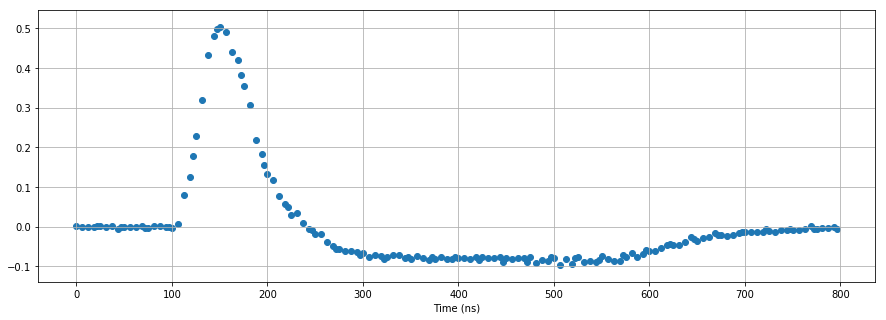

In [27]:
ser1 = pd.Series(histo_df_d.T['mean'])

fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.scatter(ser1.index, ser1)
ax.grid()
ax.set_xlabel('Time (ns)')
plt.show()

# Weighted By Energy

In [28]:
tt = np.arange(0, 32*sr+max(DFS_DICT[505]['LagTime']), 3.125)
histo_df = pd.DataFrame(columns=list(tt))

for index, row in DFS_DICT[505].iterrows():
    t = list(times + row['LagTime'])
    new_row = row['ADC']/row['ECell']
    histo_df = histo_df.append(dict(zip(t, new_row)), ignore_index=True)

weighted = True
if weighted:
    w_df = histo_df.where(pd.isnull,1).mul(weights, axis='rows')
    w_df = w_df.multiply(1 / w_df.sum(axis=0), axis=1)
    std_corr1 = w_df.sum(axis=0)**2; std_corr2 = (w_df**2).sum(axis=0)
    w_df = w_df.mul(w_df.describe().T['count'], axis=1)
    
histo_df = (histo_df * w_df).describe()
histo_df = histo_df.append(pd.Series(std_corr1/std_corr2, name='mean_std_corr'))
histo_df = histo_df.append(pd.Series(histo_df.T['std']/np.sqrt(histo_df.T['mean_std_corr']), name='std_mean'))

In [29]:
histo_df

,0.0,3.125,6.25,9.375,12.5,15.625,18.75,21.875,25.0,28.125,...,790.625,793.75,796.875,800.0,803.125,806.25,809.375,812.5,815.625,818.75
count,3.000000,0.0,3.000000,0.0,4.000000,0.0,2.000000,3.000000,3.000000,0.0,...,0.0,2.000000e+00,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.003008,NaN,-0.001626,NaN,0.000553,NaN,0.000000,0.002158,0.001671,NaN,...,NaN,-2.168404e-19,-0.005100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.004783,NaN,0.003297,NaN,0.003865,NaN,0.000000,0.011046,0.005854,NaN,...,NaN,4.731843e-03,0.003398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.002507,NaN,-0.005420,NaN,-0.004869,NaN,0.000000,-0.007650,-0.003510,NaN,...,NaN,-3.345918e-03,-0.007062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.001504,NaN,-0.002710,NaN,-0.000885,NaN,0.000000,-0.003825,-0.001504,NaN,...,NaN,-1.672959e-03,-0.007062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.005515,NaN,0.000000,NaN,0.001771,NaN,0.000000,0.000000,0.000501,NaN,...,NaN,-2.168404e-19,-0.007062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.005766,NaN,0.000271,NaN,0.003209,NaN,0.000000,0.007062,0.004262,NaN,...,NaN,1.672959e-03,-0.004119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.006016,NaN,0.000542,NaN,0.003541,NaN,0.000000,0.014123,0.008022,NaN,...,NaN,3.345918e-03,-0.001177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_std_corr,2.894383,NaN,2.980539,NaN,3.839489,NaN,1.985281,2.999777,2.894383,NaN,...,NaN,1.985281e+00,2.999777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_mean,0.002811,NaN,0.001910,NaN,0.001973,NaN,0.000000,0.006378,0.003441,NaN,...,NaN,3.358299e-03,0.001962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


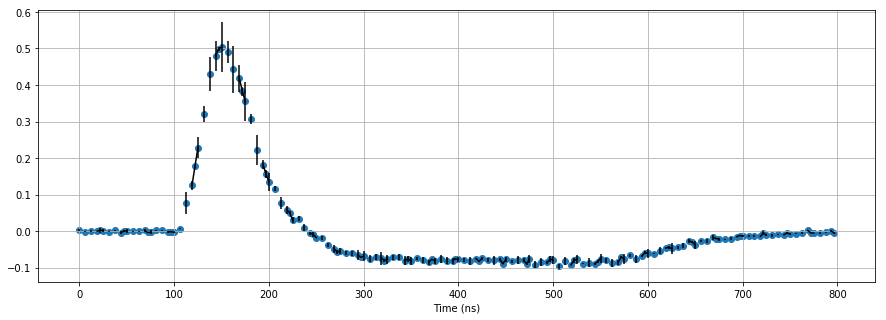

In [30]:
ser2 = pd.Series(histo_df.T['mean'])
ser_err = pd.Series(histo_df.T['std_mean'])

fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.errorbar(ser2.index, ser2, ser_err, c='k')
ax.scatter(ser2.index, ser2)
ax.grid()
ax.set_xlabel('Time (ns)')
plt.show()

# Comparison

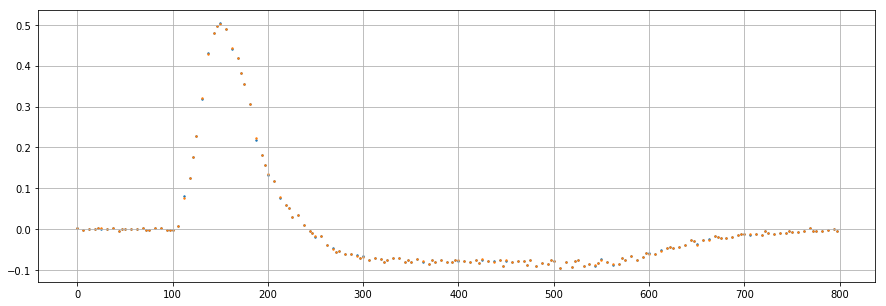

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.scatter(ser1.index, ser1, s=2)
ax.scatter(ser2.index, ser2, s=2)
ax.grid()

In [2]:
READ_PATH_TEST = '/Users/lukepolson/Documents/test_data/pulse_347848/DF1.pkl'
opened_df = pd.read_pickle(READ_PATH_TEST)

In [3]:
grouped = opened_df.groupby('HwidCell')

In [5]:
for name, group in grouped:
    print(name)

139
164
172
178
195
211
214
230
562
1311
1405
1408
1417
1418
1436
1441
1445
1446
1447
1449
1450
1454
1465
1467
1478
1487
1491
1495
1503
1515
1519
1520
1521
1522
1524
1528
1536
1552
1555
1557
1558
1559
1561
1562
1565
1588
1607
1616
1630
1669
1670
1687
1693
1700
1710
1719
1723
1733
1736
1737
1767
1779
1780
1781
1782
1790
1791
1836
1841
2185
2186
2232
2240
2245
2475
2539
2601
3320
3357
3381
3389
3390
3476
3477
3510
3524
3525
3526
3564
3565
3573
3574
3577
3579
3580
3588
3595
3597
3599
3604
3607
3620
3621
3624
3625
3636
3639
3654
3660
3661
3671
3700
3703
3713
3715
3722
3730
3731
3732
3733
3742
3748
3752
3753
3772
3776
3780
3782
3783
3785
3786
3788
3833
3834
3875
3879
3881
3883
3895
3898
4233
4245
4254
4283
4309
4321
4431
4480
4481
4482
4484
4679
4719
4720
4725
4742
4792
4793
4794
4824
4847
4848
4849
5526
5529
5533
5534
5536
5537
5538
5541
5542
5574
5584
5585
5595
5601
5603
5607
5608
5612
5617
5624
5625
5634
5635
5637
5643
5647
5648
5649
5652
5661
5662
5665
5666
5677
5689
5690
5693
5694
5698

46597
46598
46599
46603
46612
46613
46614
46618
46630
46644
46654
46656
46657
46658
46660
46662
46664
46665
46666
46667
46668
46669
46670
46671
46672
46673
46683
46708
46712
46713
46730
46734
46735
46739
46745
46773
46780
46796
46800
46805
46838
46852
46866
46867
46868
46869
46871
46874
46882
46904
47234
47246
47250
47257
47269
47270
47272
47277
47293
47295
47308
47317
47340
47476
47575
47722
47723
47744
47816
48516
48520
48538
48547
48553
48572
48600
48601
48610
48611
48613
48614
48617
48633
48657
48663
48665
48669
48670
48673
48674
48676
48720
48723
48725
48726
48727
48731
48739
48740
48743
48759
48775
48781
48806
48810
48814
48836
48840
48848
48851
48895
49306
49370
49377
49379
49381
49395
49739
49800
49814
50492
50557
50591
50592
50596
50601
50602
50605
50608
50610
50611
50617
50648
50694
50704
50705
50708
50714
50720
50724
50726
50727
50729
50737
50738
50754
50758
50763
50771
50795
50796
50818
50819
50826
50829
50830
50837
50874
50880
50897
50906
50933
50944
50945
50960
50965
5100

97866
97908
97917
97919
97937
97938
97944
97970
97972
97976
97983
97985
98020
98021
98027
98055
98074
98077
98078
98087
98103
98109
98452
98521
98529
98538
98797
98819
98820
98920
98965
99708
99727
99732
99764
99773
99814
99826
99828
99839
99840
99843
99850
99854
99858
99872
99876
99881
99883
99900
99904
99908
99925
99926
99927
99929
99942
99943
99952
99953
99965
99966
99968
99985
99986
99989
99990
100020
100036
100041
100044
100045
100047
100072
100073
100077
100101
100118
100134
100481
100568
100572
100576
100586
100590
100591
100600
100991
101050
101103
101763
101811
101824
101865
101872
101886
101887
101894
101905
101926
101930
101937
101949
101961
101962
101965
101975
101979
101981
101982
101984
101985
101986
101988
101989
101990
102007
102029
102033
102088
102089
102090
102104
102108
102128
102131
102145
102148
102174
102200
102204
102531
102535
102566
102586
102601
102606
102619
102626
102631
102759
103278
103741
103811
103824
103830
103850
103854
103857
103858
103871
103888
103

143675
143676
143677
143678
143679
143697
143698
143699
143700
143702
143703
143704
143708
143712
143713
143714
143715
143716
143717
143718
143719
143720
143721
143722
143723
143724
143725
143726
143727
143729
143731
143733
143734
143736
143737
143738
143739
143740
143741
143742
143743
143760
143762
143763
143764
143766
143776
143777
143778
143779
143780
143781
143782
143783
143784
143785
143786
143787
143788
143789
143790
143791
143793
143795
143796
143797
143798
143799
143800
143801
143802
143803
143805
143806
143807
143825
143826
143827
143828
143829
143831
143832
143833
143835
143836
143840
143841
143842
143843
143844
143845
143846
143847
143848
143849
143850
143851
143852
143853
143854
143855
143858
143859
143860
143861
143862
143863
143864
143865
143866
143867
143868
143869
143870
143871
143889
143891
143895
143897
143901
143904
143905
143906
143907
143908
143909
143910
143911
143912
143913
143914
143915
143916
143917
143918
143921
143922
143923
143924
143926
143927
143928
143929

161250
161268
161269
161280
161282
161299
161317
161318
161336
161339
161346
161347
161351
161360
161362
161364
161365
161366
161367
161368
161369
161370
161376
161377
161402
161405
161406
161413
161418
161419
161433
161478
161482
161508
161531
161924
161925
161942
161945
161946
161965
162311
162833
163093
163094
163104
163124
163143
163146
163174
163175
163176
163180
163188
163194
163196
163273
163400
163470
163614
163623
163626
163627
163649
163658
163659
163745
163746
163747
163819
163968
163969
163970
163971
163972
163973
163974
163976
163977
163978
163979
163981
163982
163983
163984
163985
163986
163987
163988
163989
163990
163991
163992
163993
163996
163997
164000
164001
164003
164004
164005
164006
164007
164008
164009
164010
164011
164012
164013
164014
164015
164016
164017
164018
164019
164020
164021
164022
164023
164024
164028
164029
164032
164033
164034
164035
164036
164037
164038
164039
164040
164041
164042
164043
164044
164045
164046
164047
164048
164049
164050
164051
164052

202941
202944
202945
202946
202948
202949
202950
202951
202952
202955
202956
202957
202958
202959
202960
202961
202962
202963
202964
202965
202966
202967
202968
202969
202972
202973
202976
202977
202978
202979
202980
202981
202982
202983
202984
202985
202986
202987
202988
202989
202990
202991
202993
202994
202995
202996
202997
202998
202999
203000
203004
203005
203015
203021
203064
203065
203100
203101
203115
203392
203396
203400
203404
203412
203413
203425
203428
203429
203432
203433
203436
203437
203441
203444
203445
203449
203452
203453
203460
203464
203472
203474
203476
203477
203480
203481
203485
203492
203493
203496
203500
203504
203505
203513
203516
203520
203528
203532
203544
203549
203552
203556
203561
203562
203564
203565
203569
203573
203576
203580
203581
203588
203593
203596
203600
203604
203605
203609
203616
203620
203621
203622
203624
203625
203628
203629
203632
203633
203634
203636
203640
203641
203644
203648
203652
203656
203657
203664
203665
203668
203672
203673
203676

214733
214763
215197
215203
215208
215216
215217
215304
215360
215364
215458
215459
215555
215567
215662
216002
216254
216378
216429
216430
216482
216483
216567
216571
216833
216859
216945
217056
217057
217058
217059
217072
217073
217076
217077
217080
217216
217217
217218
217219
217220
217221
217222
217223
217224
217225
217226
217227
217229
217230
217231
217232
217233
217234
217236
217237
217239
217241
217244
217245
217248
217249
217250
217251
217252
217253
217254
217255
217256
217257
217258
217259
217260
217261
217262
217263
217264
217265
217266
217267
217268
217269
217270
217271
217272
217273
217276
217277
217280
217281
217282
217283
217284
217285
217286
217287
217288
217289
217290
217291
217292
217293
217294
217295
217296
217297
217298
217299
217300
217301
217302
217303
217304
217305
217308
217309
217312
217313
217314
217315
217316
217317
217318
217319
217320
217321
217322
217323
217324
217325
217326
217327
217328
217329
217330
217331
217333
217334
217336
217337
217340
217341
217728

241876
241877
241878
241879
241880
241881
241884
241885
241888
241889
241890
241891
241892
241893
241894
241895
241896
241897
241898
241899
241900
241901
241902
241903
241904
241905
241906
241907
241909
241911
241912
241913
241916
241917
241956
241968
242304
242312
242320
242325
242332
242336
242337
242344
242345
242348
242350
242352
242353
242357
242358
242360
242361
242364
242366
242368
242372
242376
242380
242384
242388
242392
242393
242396
242400
242402
242408
242409
242412
242413
242414
242416
242417
242424
242425
242429
242432
242436
242444
242448
242449
242456
242457
242460
242461
242465
242466
242468
242472
242473
242476
242480
242481
242482
242484
242488
242489
242492
242493
242500
242504
242505
242512
242516
242517
242520
242521
242524
242528
242529
242532
242533
242536
242537
242538
242540
242541
242542
242544
242545
242546
242548
242552
242553
242556
242557
242560
242561
242564
242566
242568
242574
242576
242580
242581
242584
242585
242587
242588
242589
242592
242596
242600